<p style = "font-size : 50px; color : 'blue' ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>IRIS FLOWER CLASSIFICATION</strong></p>

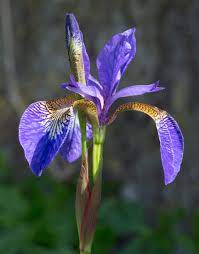

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#information about the dataset
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#describing about the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 6)

### We drop the column id because it is not important.

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

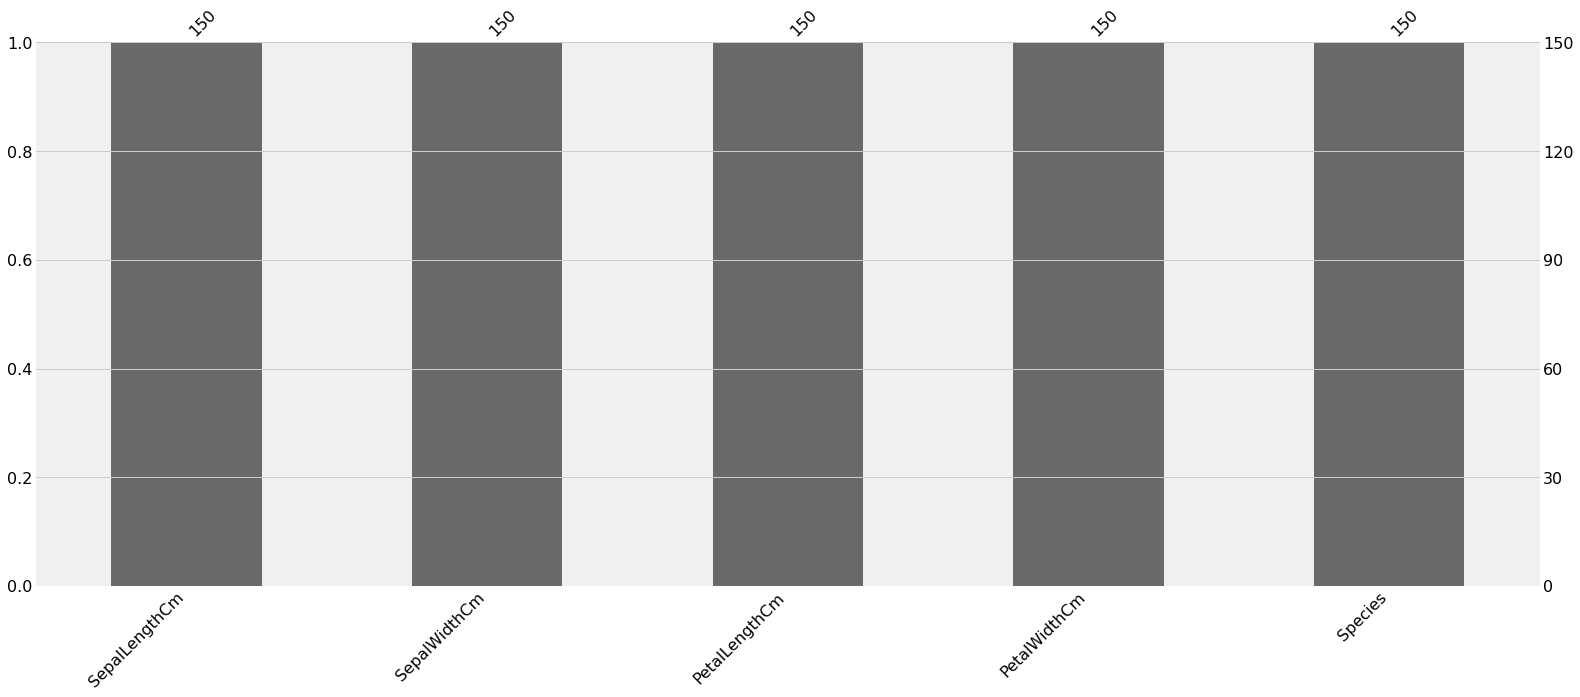

In [10]:
import missingno as msno
msno.bar(df)

In [11]:
df.drop_duplicates(inplace=True)

# EDA 

### 1. Relationship between species and sepal length

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

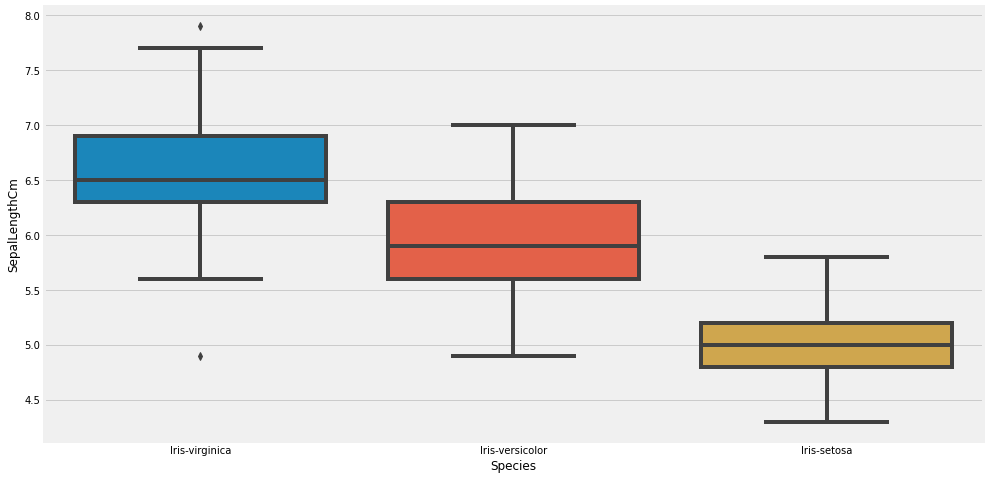

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

### 2. Relationship between species and sepal width

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

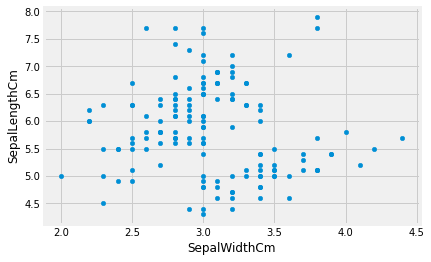

In [13]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

### 3. Relationship between sepal width and sepal length

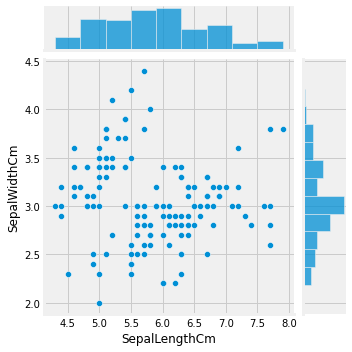

In [14]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

### 4.Pairplot

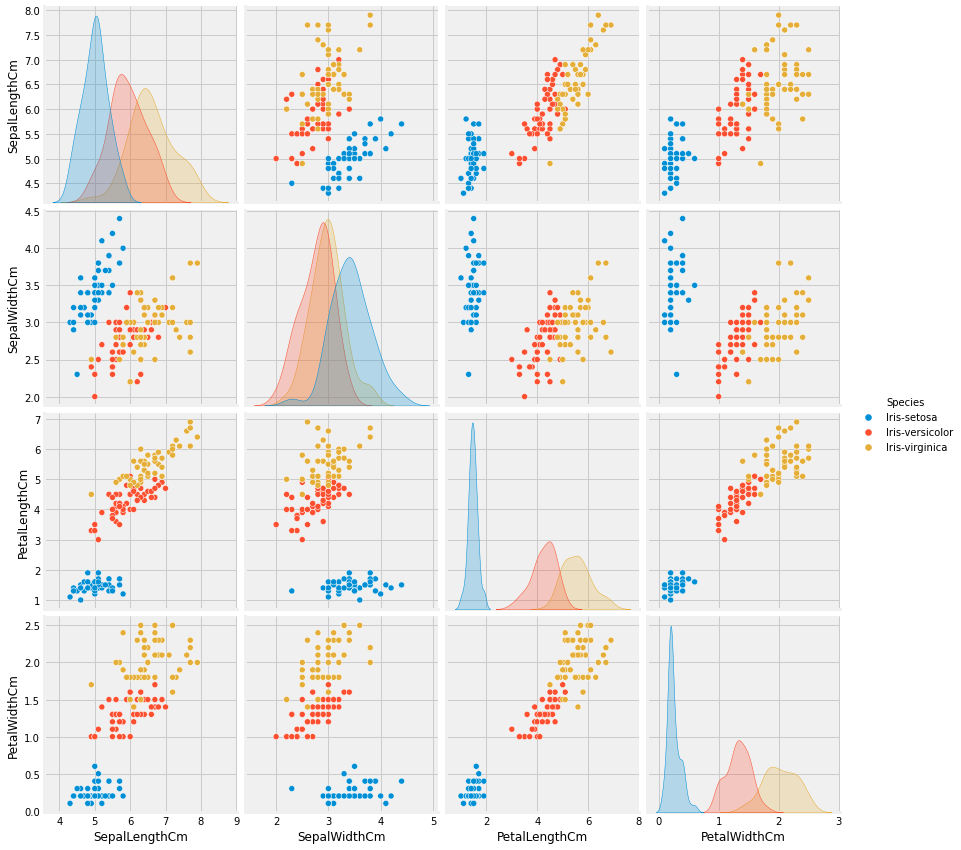

In [15]:
sns.pairplot(df, hue="Species", size=3)

### 5. Boxplot

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

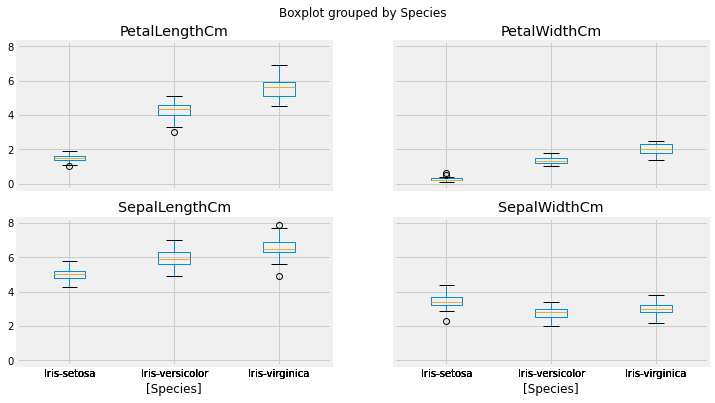

In [16]:
df.boxplot(by="Species", figsize=(12, 6))

### 5. Andrews_curves

<AxesSubplot:>

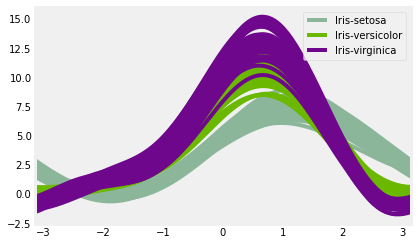

In [17]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

### 6.CategoricalPlot

<Figure size 1080x1080 with 0 Axes>

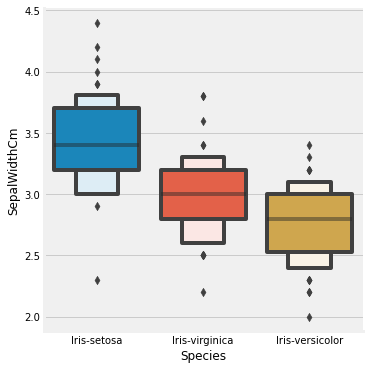

In [18]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

### 7.Violinplot

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

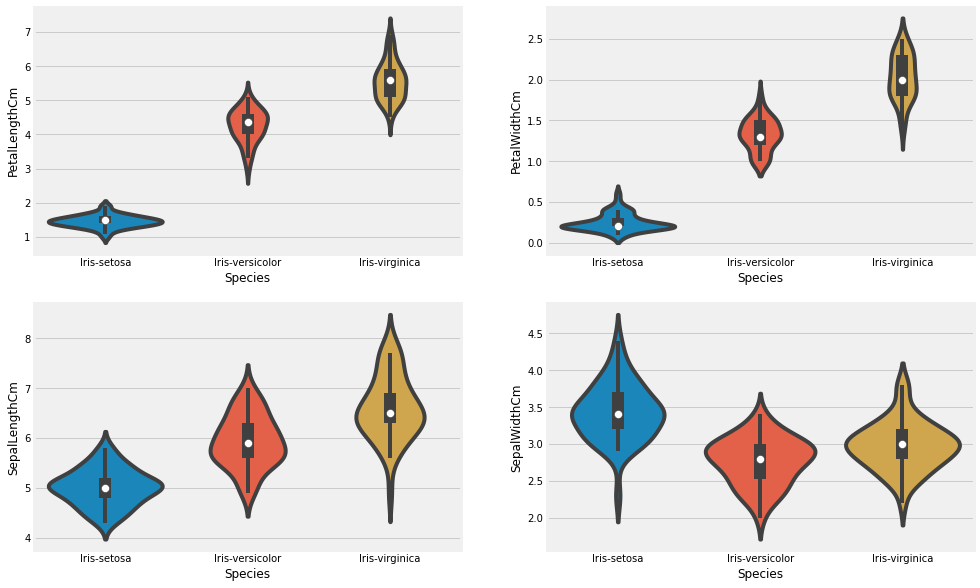

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

# Neural Network

In [20]:
X=df.drop('Species',axis=1)
y=df['Species']


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [22]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [24]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 205ms/step - loss: 1.3813 - accuracy: 0.3055 - val_loss: 1.1724 - val_accuracy: 0.3111
Epoch 2/45
4/4 [==============================] - 0s 18ms/step - loss: 1.2064 - accuracy: 0.3127 - val_loss: 1.0806 - val_accuracy: 0.5778
Epoch 3/45
4/4 [==============================] - 0s 18ms/step - loss: 1.0790 - accuracy: 0.5135 - val_loss: 1.0208 - val_accuracy: 0.6444
Epoch 4/45
4/4 [==============================] - 0s 17ms/step - loss: 1.0296 - accuracy: 0.6158 - val_loss: 0.9808 - val_accuracy: 0.6000
Epoch 5/45
4/4 [==============================] - 0s 19ms/step - loss: 0.9910 - accuracy: 0.5683 - val_loss: 0.9497 - val_accuracy: 0.5778
Epoch 6/45
4/4 [==============================] - 0s 18ms/step - loss: 0.9612 - accuracy: 0.5634 - val_loss: 0.9173 - val_accuracy: 0.6000
Epoch 7/45
4/4 [==============================] - 0s 18ms/step - loss: 0.9164 - accuracy: 0.5837 - val_loss: 0.8855 - val_accuracy: 0.6000
Epoch 8/45
4/4 [==========

In [27]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.9778


[0.4203509986400604, 0.9777777791023254]

In [28]:
pred = model.predict(X_test[:10])
print(pred)

[[0.00780903 0.38335416 0.60883677]
 [0.00557288 0.3841335  0.6102936 ]
 [0.07005701 0.55819845 0.37174454]
 [0.04161694 0.53392386 0.42445916]
 [0.9148916  0.07197795 0.01313045]
 [0.04308057 0.5639903  0.39292914]
 [0.00754713 0.334545   0.6579079 ]
 [0.00803394 0.34725025 0.6447158 ]
 [0.9088877  0.07749306 0.01361927]
 [0.01435832 0.41966268 0.565979  ]]


In [29]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [30]:
history.history['accuracy']

[0.3235294222831726,
 0.3235294222831726,
 0.5,
 0.6176470518112183,
 0.5588235259056091,
 0.5490196347236633,
 0.5686274766921997,
 0.6274510025978088,
 0.656862735748291,
 0.6666666865348816,
 0.7745097875595093,
 0.6666666865348816,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.6764705777168274,
 0.6764705777168274,
 0.8235294222831726,
 0.9411764740943909,
 0.8921568393707275,
 0.8823529481887817,
 0.9509803652763367,
 0.9019607901573181,
 0.6764705777168274,
 0.6666666865348816,
 0.6960784196853638,
 0.7745097875595093,
 0.7352941036224365,
 0.8529411554336548,
 0.9803921580314636,
 0.8921568393707275,
 0.9019607901573181,
 0.9803921580314636,
 0.9019607901573181,
 0.8529411554336548,
 0.8529411554336548,
 0.813725471496582,
 0.8627451062202454,
 0.9509803652763367,
 0.9607843160629272,
 0.9215686321258545,
 0.9607843160629272,
 0.970588207244873,
 0.970588207244873]

In [31]:
history.history['val_accuracy']

[0.31111112236976624,
 0.5777778029441833,
 0.644444465637207,
 0.6000000238418579,
 0.5777778029441833,
 0.6000000238418579,
 0.6000000238418579,
 0.7555555701255798,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7555555701255798,
 0.9333333373069763,
 0.8888888955116272,
 0.8444444537162781,
 0.9555555582046509,
 0.9333333373069763,
 0.7555555701255798,
 0.6666666865348816,
 0.7333333492279053,
 0.7777777910232544,
 0.7555555701255798,
 0.7777777910232544,
 0.9333333373069763,
 0.9111111164093018,
 0.8888888955116272,
 0.9555555582046509,
 0.9111111164093018,
 0.800000011920929,
 0.8222222328186035,
 0.7777777910232544,
 0.7777777910232544,
 0.8888888955116272,
 0.9777777791023254,
 0.9555555582046509,
 0.9555555582046509,
 0.9777777791023254,
 0.9111111164093018,
 0.9777777791023254]

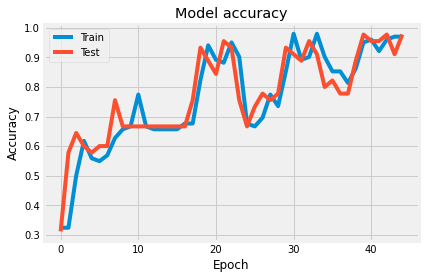

In [32]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

